# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan adalah Daily Food & Nutrition Dataset dari Kaggle
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Dataset Memiliki 10.000 data
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: (Food_Item, Category, dan Meal_Type)
     - *Numerikal*: ( Date, User_ID, Calories (kcal), Protein (g), Carbohydrates (g), Fat (g), Fiber (g), Sugars (g), Sodium (mg), Cholesterol (mg), Meal_Type, dan Water_Intake (ml) )

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import mode


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dataset_machine_learning/Dataset_inisiasi.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4. Exploratory Data Analysis (EDA)**

In [ ]:
df.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,9/11/2024,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,12/17/2024,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,6/9/2024,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,8/27/2024,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,7/28/2024,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
Date,0
User_ID,0
Food_Item,0
Category,0
Calories (kcal),0
Protein (g),0
Carbohydrates (g),0
Fat (g),0
Fiber (g),0
Sugars (g),0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [ ]:
print(df.describe(include='all'))

             Date       User_ID Food_Item Category  Calories (kcal)  \
count       10000  10000.000000     10000    10000     10000.000000   
unique        366           NaN        35        7              NaN   
top     5/20/2024           NaN      Milk    Dairy              NaN   
freq           45           NaN       311     1460              NaN   
mean          NaN    498.706300       NaN      NaN       327.693900   
std           NaN    289.123477       NaN      NaN       158.194716   
min           NaN      1.000000       NaN      NaN        50.000000   
25%           NaN    245.000000       NaN      NaN       190.000000   
50%           NaN    492.000000       NaN      NaN       328.000000   
75%           NaN    748.000000       NaN      NaN       464.000000   
max           NaN   1000.000000       NaN      NaN       600.000000   

         Protein (g)  Carbohydrates (g)      Fat (g)     Fiber (g)  \
count   10000.000000       10000.000000  10000.00000  10000.000000   
unique 

Text(0, 0.5, 'Item Makanan')

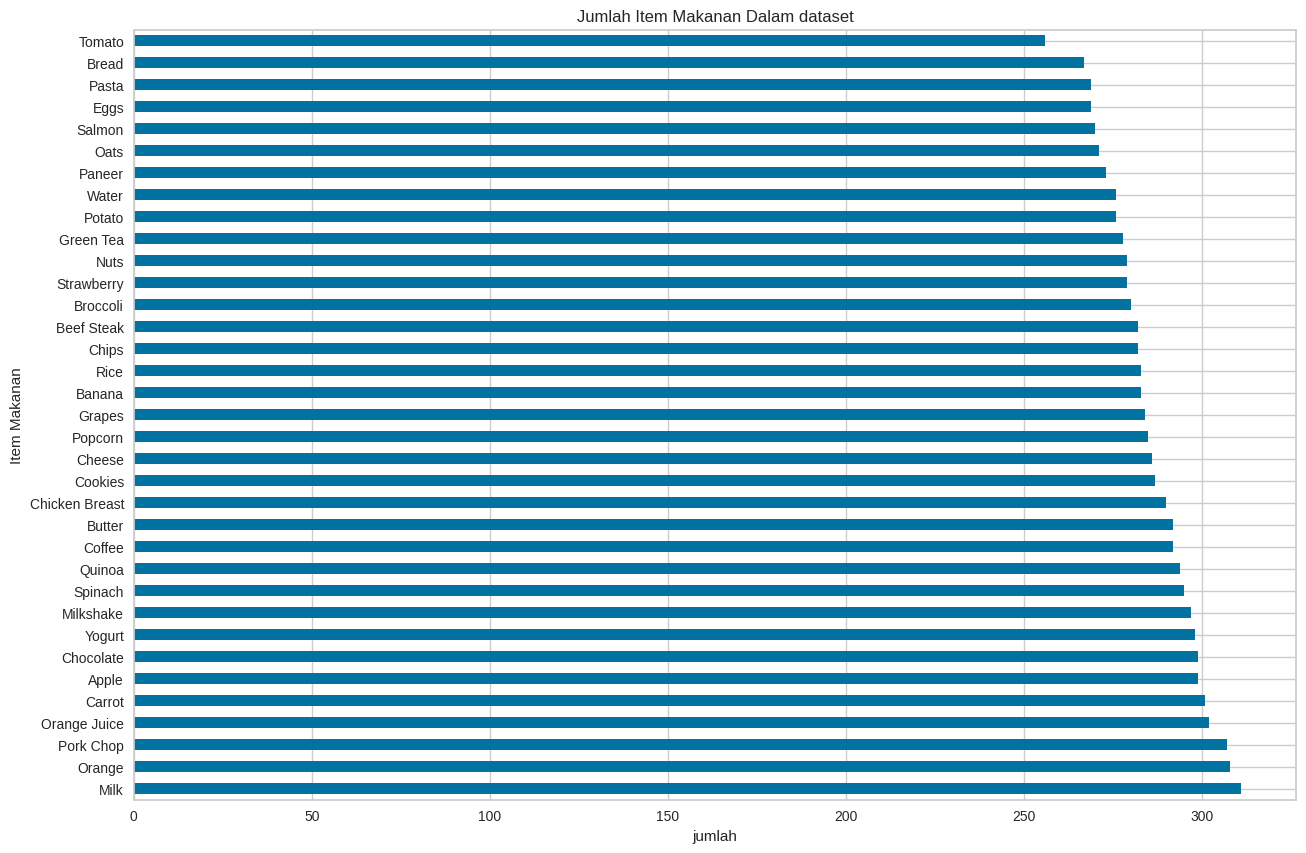

In [ ]:
food_item_counts = df['Food_Item'].value_counts()

food_item_barchart = food_item_counts.plot.barh(figsize=(15, 10))
food_item_barchart.set_title('Jumlah Item Makanan Dalam dataset')
food_item_barchart.set_xlabel('jumlah')
food_item_barchart.set_ylabel('Item Makanan')

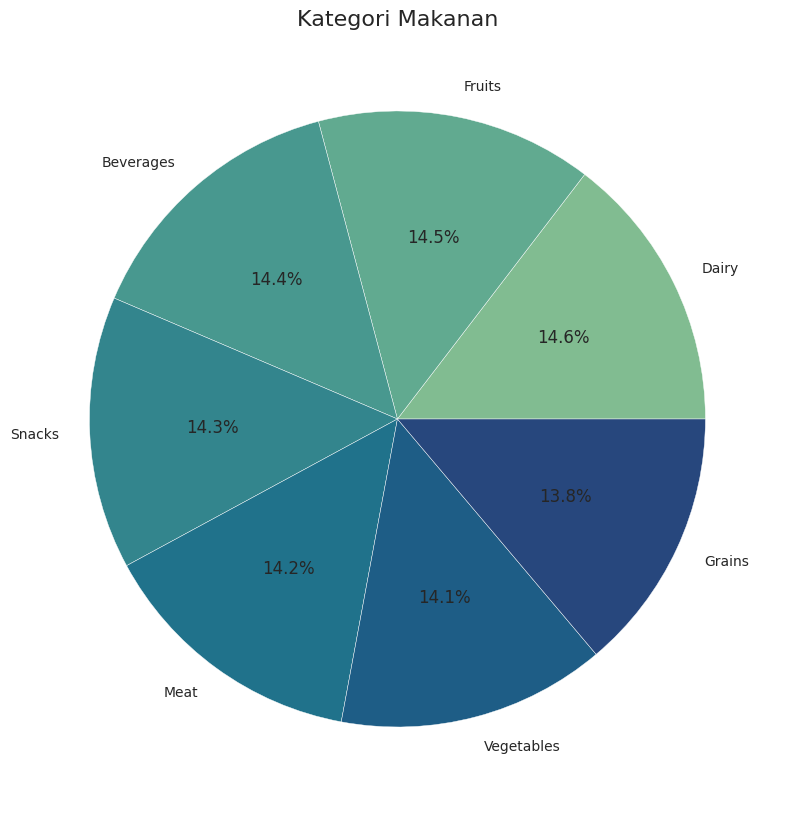

In [ ]:
category_counts = df['Category'].value_counts()

# Hitung persentase setiap kategori
category_percentages = (category_counts / len(df)) * 100

plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
colors = sns.color_palette('crest', len(category_percentages))
category_pie_chart = plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Kategori Makanan', fontsize=16)
plt.show()

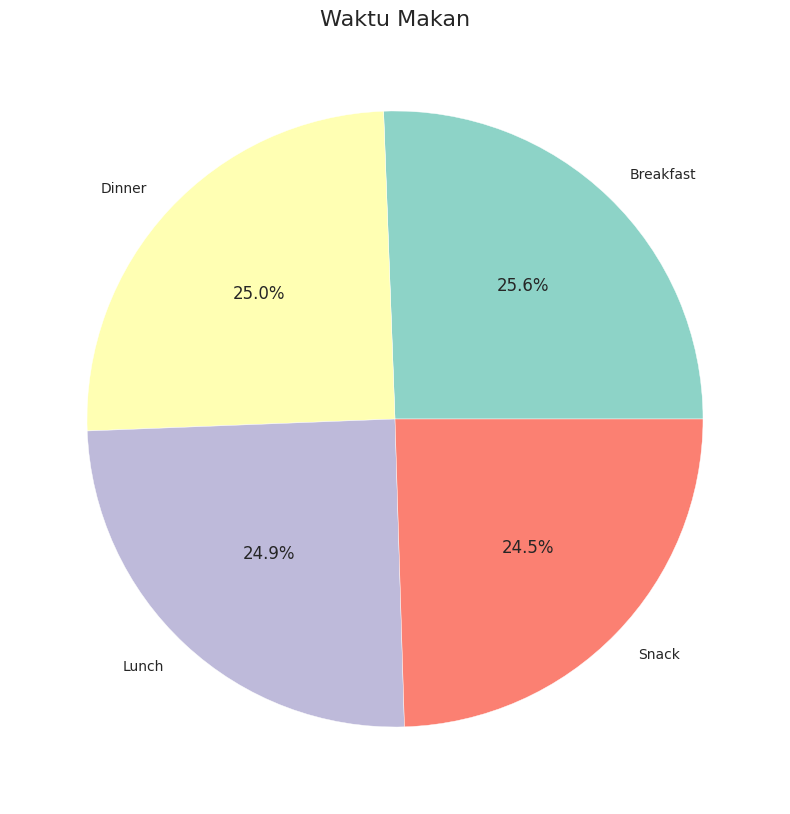

In [ ]:
meal_type_counts = df['Meal_Type'].value_counts()

# Hitung persentase setiap jenis makanan
meal_type_percentages = (meal_type_counts / len(df)) * 100

plt.figure(figsize=(10, 10))
colors = sns.color_palette('Set3', len(meal_type_percentages))
plt.pie(meal_type_percentages, labels=meal_type_percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Waktu Makan', fontsize=16)
plt.show()


<ipython-input-24-42e7a0e67ab4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


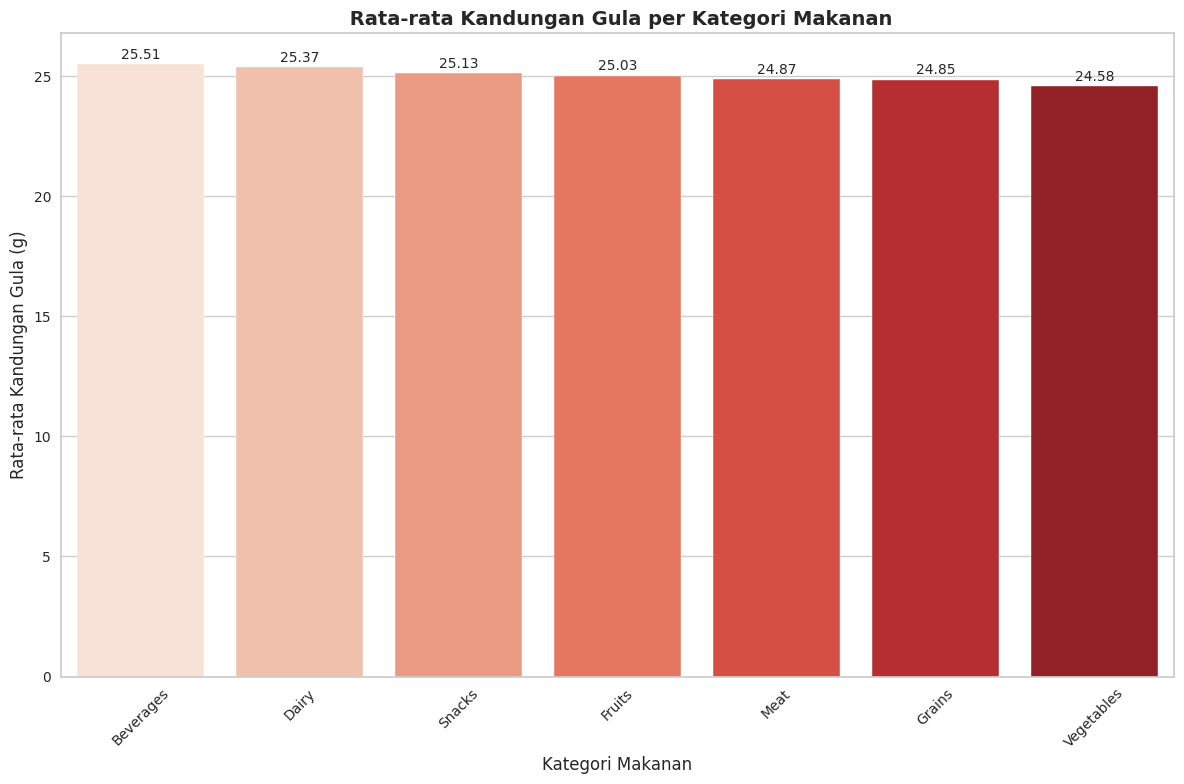

In [ ]:
mean_sugar = df.groupby('Category')['Sugars (g)'].mean()
sorted_average_sugar = mean_sugar.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Mengatur palet warna berdasarkan nilai (semakin manis, makin merah)
colors = sns.color_palette("Reds", len(sorted_average_sugar))

# Plot
barplot = sns.barplot(
    x=sorted_average_sugar.index,
    y=sorted_average_sugar.values,
    palette=colors
)

# Tambahkan label di atas bar
for i, val in enumerate(sorted_average_sugar.values):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

# Judul dan label
plt.xlabel('Kategori Makanan', fontsize=12)
plt.ylabel('Rata-rata Kandungan Gula (g)', fontsize=12)
plt.title(' Rata-rata Kandungan Gula per Kategori Makanan', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


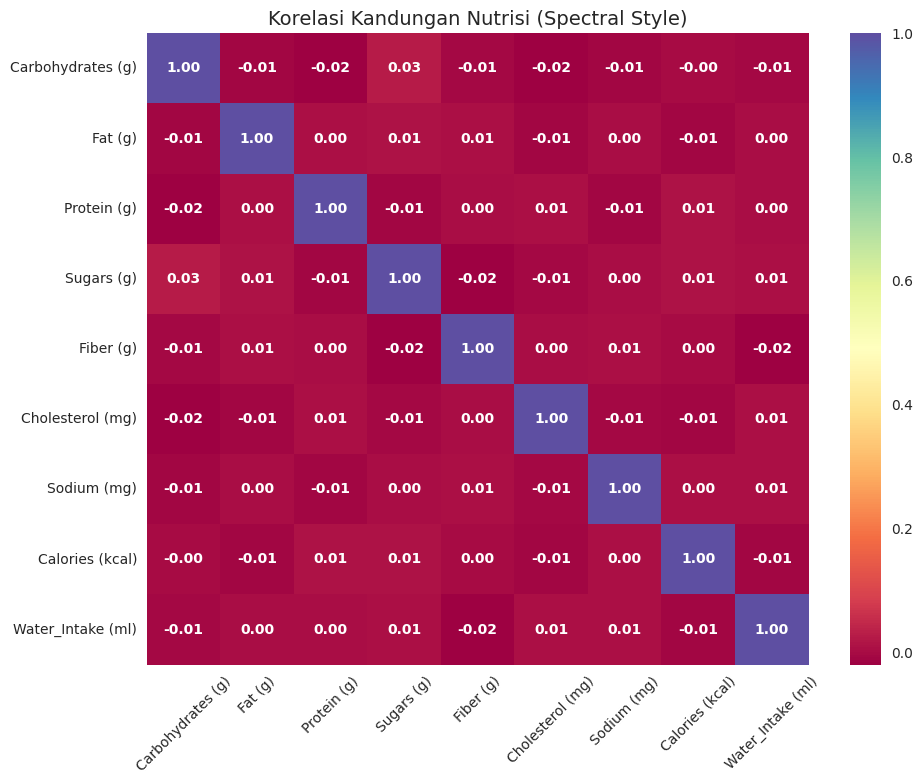

In [ ]:
nutrition_columns = ['Carbohydrates (g)', 'Fat (g)', 'Protein (g)', 'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Calories (kcal)', 'Water_Intake (ml)']
correlation = df[nutrition_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="Spectral", annot_kws={"size": 10, "weight": "bold"})
plt.title('Korelasi Kandungan Nutrisi (Spectral Style)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-29-fac9ac139cc0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


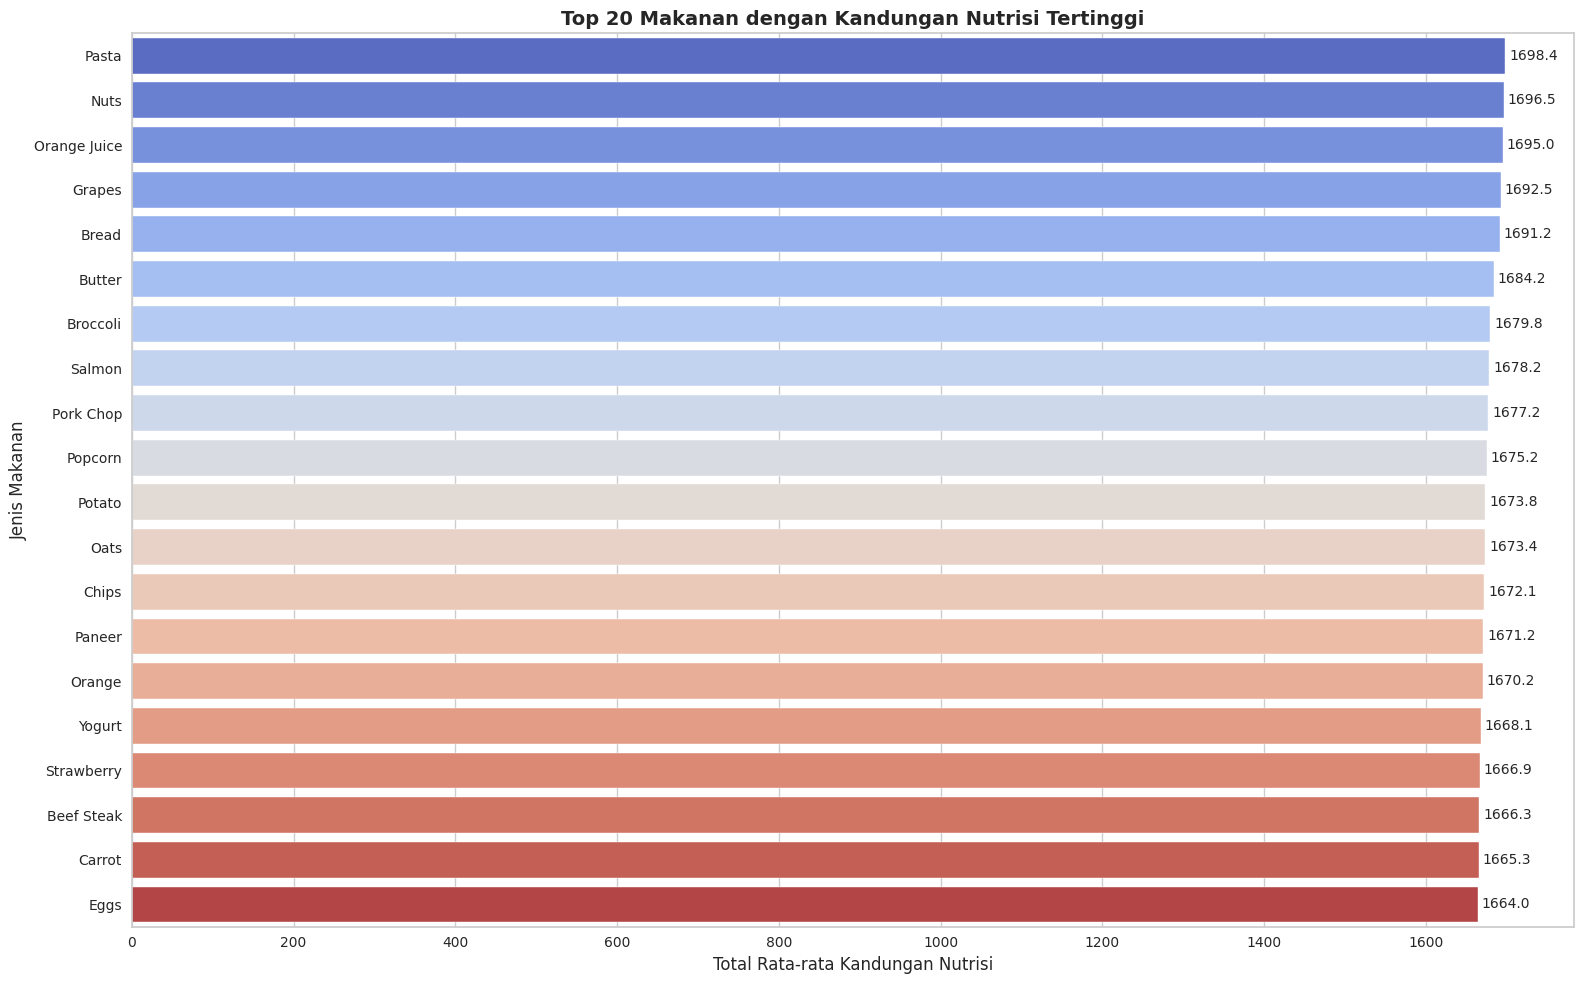

In [ ]:

grouped_df = df.groupby('Food_Item')[['Carbohydrates (g)', 'Fat (g)', 'Protein (g)', 'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Calories (kcal)', 'Water_Intake (ml)']].mean().reset_index()

# Hitung total nilai nutrisi
grouped_df['Total'] = grouped_df['Carbohydrates (g)'] + grouped_df['Fat (g)'] + grouped_df['Protein (g)'] + grouped_df['Sugars (g)'] + grouped_df['Fiber (g)'] + grouped_df['Cholesterol (mg)'] + grouped_df['Sodium (mg)'] + grouped_df['Calories (kcal)'] + grouped_df['Water_Intake (ml)']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

# Ambil 20 makanan teratas saja agar lebih jelas
top_n = 20
top_foods = grouped_df.head(top_n)

# Palet warna gradasi dari tinggi ke rendah
colors = sns.color_palette("coolwarm", len(top_foods))

# Barplot horizontal agar label terbaca jelas
sns.barplot(
    y=top_foods['Food_Item'],
    x=top_foods['Total'],
    palette=colors
)

# Tambahkan label di ujung bar
for i, value in enumerate(top_foods['Total']):
    plt.text(value + 5, i, f'{value:.1f}', va='center', fontsize=10)

plt.xlabel('Total Rata-rata Kandungan Nutrisi', fontsize=12)
plt.ylabel('Jenis Makanan', fontsize=12)
plt.title('Top 20 Makanan dengan Kandungan Nutrisi Tertinggi', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
numerical_cols = ['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)',
                  'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)',
                  'Cholesterol (mg)', 'Water_Intake (ml)']

<ipython-input-31-5ea05b7d330b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Fitur', y='Nilai', palette="coolwarm")


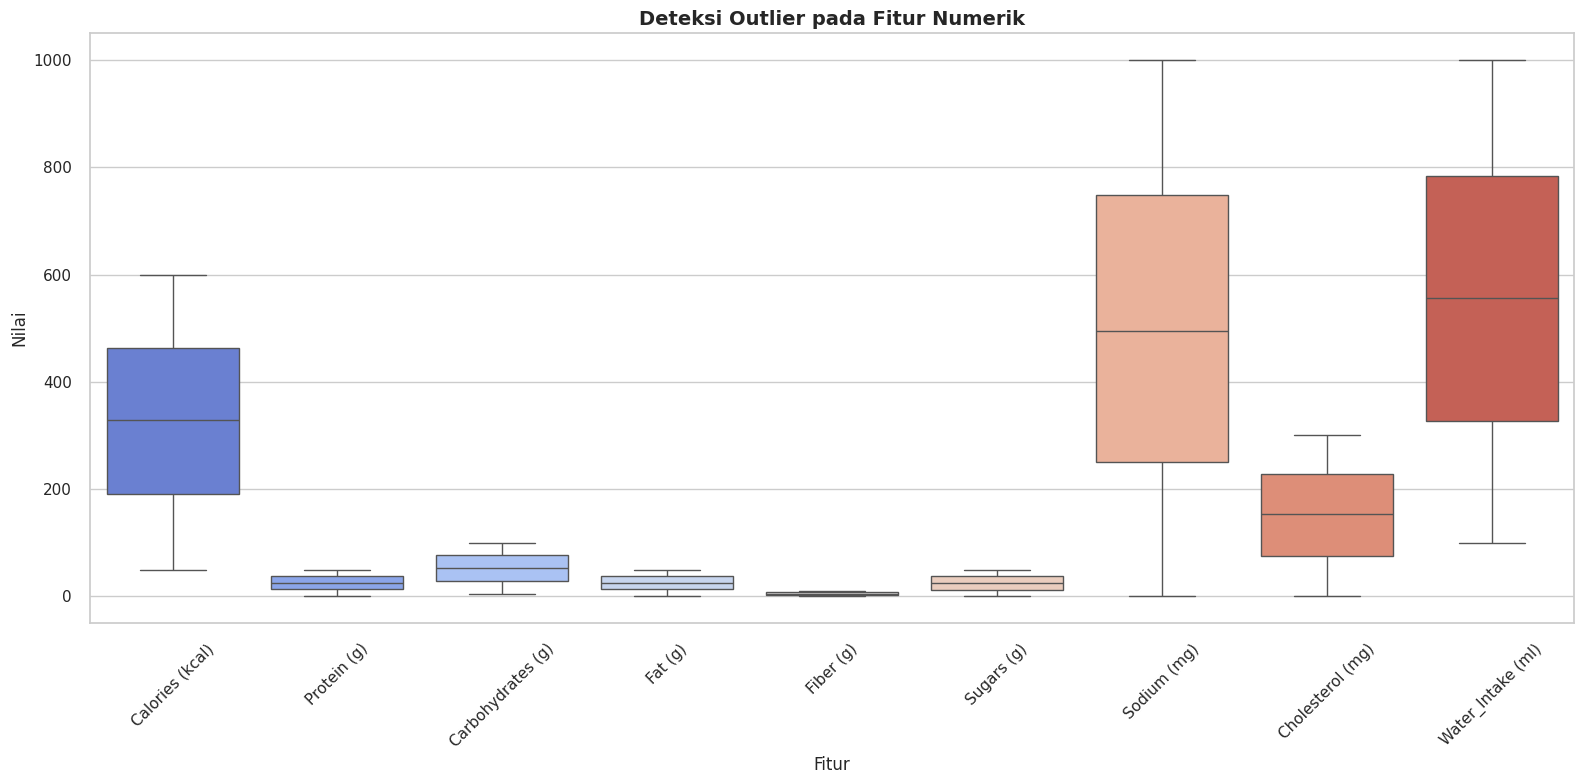

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Ubah data ke format long agar seaborn bisa membaca
df_melted = df[numerical_cols].melt(var_name='Fitur', value_name='Nilai')

# Boxplot
sns.boxplot(data=df_melted, x='Fitur', y='Nilai', palette="coolwarm")

# Styling tambahan
plt.title("Deteksi Outlier pada Fitur Numerik", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel("Fitur", fontsize=12)
plt.ylabel("Nilai", fontsize=12)
plt.tight_layout()
plt.show()


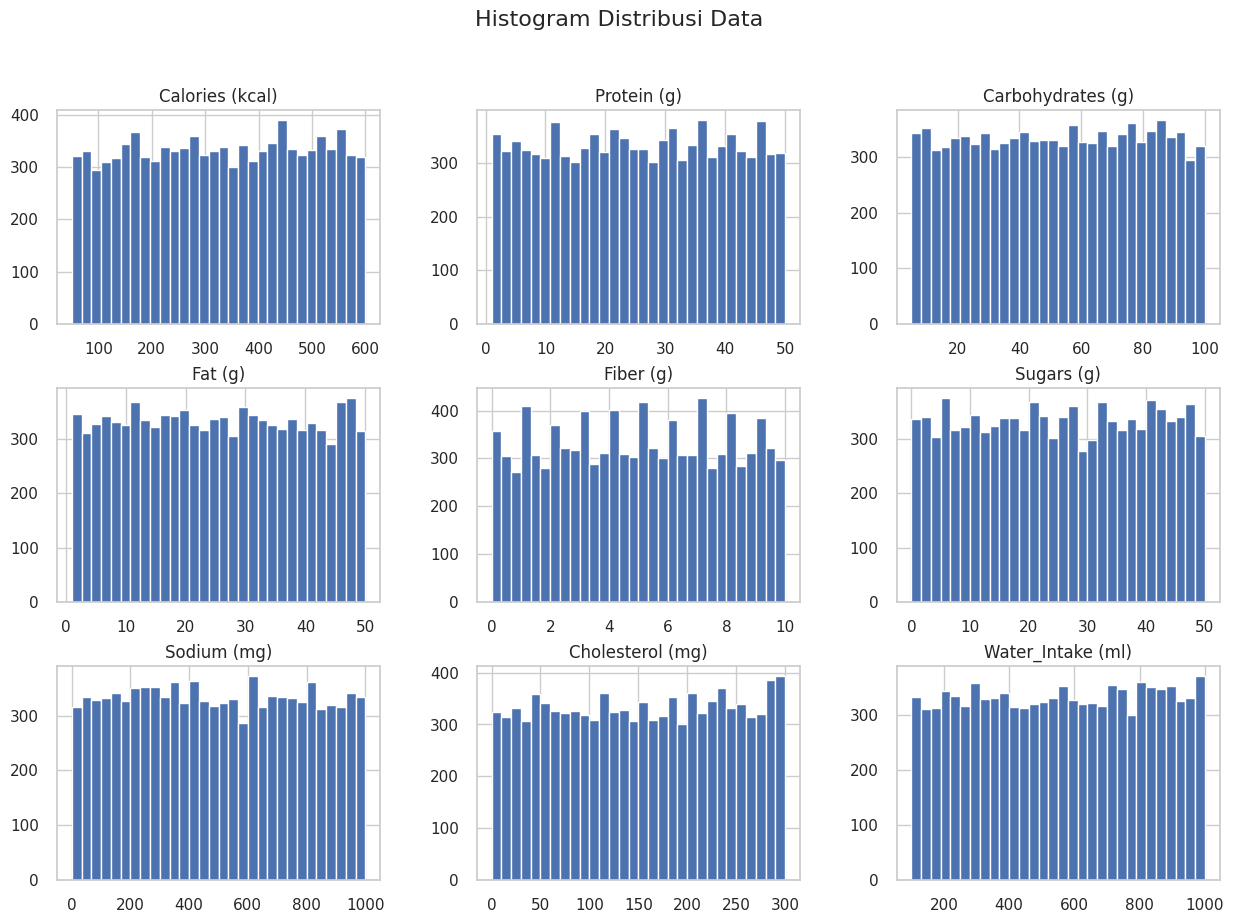

In [ ]:
df[numerical_cols].hist(figsize=(15, 10), bins=30, layout=(3,3))
plt.suptitle("Histogram Distribusi Data", fontsize=16)
plt.show()

In [ ]:
skewness_values = df[numerical_cols].skew()
skewness_values

,0
Calories (kcal),-0.023511
Protein (g),-0.011440
Carbohydrates (g),-0.019422
Fat (g),0.014582
Fiber (g),-0.002138
Sugars (g),-0.009678
Sodium (mg),0.020160
Cholesterol (mg),-0.020035
Water_Intake (ml),-0.018123


In [ ]:
# deteksi outlier pake metode quantile
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
outliers_iqr

,0
Calories (kcal),0
Protein (g),0
Carbohydrates (g),0
Fat (g),0
Fiber (g),0
Sugars (g),0
Sodium (mg),0
Cholesterol (mg),0
Water_Intake (ml),0


## Insight EDA
1. Data Overview
Jumlah data: 10.000 baris dan 14 kolom.

  Kondisi data:

- Tidak ditemukan missing values.

- Tidak terdapat data duplikat.

2. Tipe Data
  
  Kategorikal:

- Date, Food_Item, Category, Meal_Type

  Numerikal:

- User_ID, Calories (kcal), Protein (g), Carbohydrates (g), Fat (g), Fiber (g),
Sugars (g), Sodium (mg), Cholesterol (mg), Water_Intake (ml)

3. Distribusi Data

  Item makanan dengan frekuensi tertinggi:

- Milk, Orange, dan Pork Chop.

  Makanan dengan total kandungan nutrisi tertinggi:

- Pasta (berdasarkan rata-rata total nutrisi per item).

  Waktu makan yang paling sering muncul:

- Breakfast (sarapan).

4. Outlier dan Distribusi

- Berdasarkan boxplot dan metode IQR, dataset tidak mengandung outlier signifikan.

- Skewness pada fitur numerik menunjukkan distribusi normal hingga sedikit miring, tidak memerlukan transformasi.

5. Korelasi Antar Fitur
Tidak ditemukan korelasi kuat antar fitur numerik.

  Hubungan antar nutrisi bersifat lemah hingga sedang, tanpa indikasi multikolinearitas.


# **5. Data Preprocessing**

In [ ]:
df.drop(columns=["Date", "User_ID"], inplace=True)

In [ ]:
categorical_cols = ["Food_Item", "Category", "Meal_Type"]
label_encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder

In [ ]:
for col, encoder in label_encoders.items():
    print(f"Mapping Label Encoder untuk '{col}':")
    label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(label_mapping)
    print("\n")

Mapping Label Encoder untuk 'Food_Item':
{'Apple': np.int64(0), 'Banana': np.int64(1), 'Beef Steak': np.int64(2), 'Bread': np.int64(3), 'Broccoli': np.int64(4), 'Butter': np.int64(5), 'Carrot': np.int64(6), 'Cheese': np.int64(7), 'Chicken Breast': np.int64(8), 'Chips': np.int64(9), 'Chocolate': np.int64(10), 'Coffee': np.int64(11), 'Cookies': np.int64(12), 'Eggs': np.int64(13), 'Grapes': np.int64(14), 'Green Tea': np.int64(15), 'Milk': np.int64(16), 'Milkshake': np.int64(17), 'Nuts': np.int64(18), 'Oats': np.int64(19), 'Orange': np.int64(20), 'Orange Juice': np.int64(21), 'Paneer': np.int64(22), 'Pasta': np.int64(23), 'Popcorn': np.int64(24), 'Pork Chop': np.int64(25), 'Potato': np.int64(26), 'Quinoa': np.int64(27), 'Rice': np.int64(28), 'Salmon': np.int64(29), 'Spinach': np.int64(30), 'Strawberry': np.int64(31), 'Tomato': np.int64(32), 'Water': np.int64(33), 'Yogurt': np.int64(34)}


Mapping Label Encoder untuk 'Category':
{'Beverages': np.int64(0), 'Dairy': np.int64(1), 'Fruits': np.

In [ ]:
df.head()

,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,13,4,173,42.4,83.7,1.5,1.5,12.7,752,125,2,478
1,0,2,66,39.2,13.8,3.2,2.6,12.2,680,97,2,466
2,8,4,226,27.1,79.1,25.8,3.2,44.7,295,157,0,635
3,1,2,116,43.4,47.1,16.1,6.5,44.1,307,13,3,379
4,1,2,500,33.9,75.8,47.0,7.8,19.4,358,148,2,471


In [ ]:
numerical= ['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)',
                  'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)',
                  'Cholesterol (mg)', 'Water_Intake (ml)']

<ipython-input-40-8f298ceb05c2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Fitur', y='Nilai', palette='coolwarm')


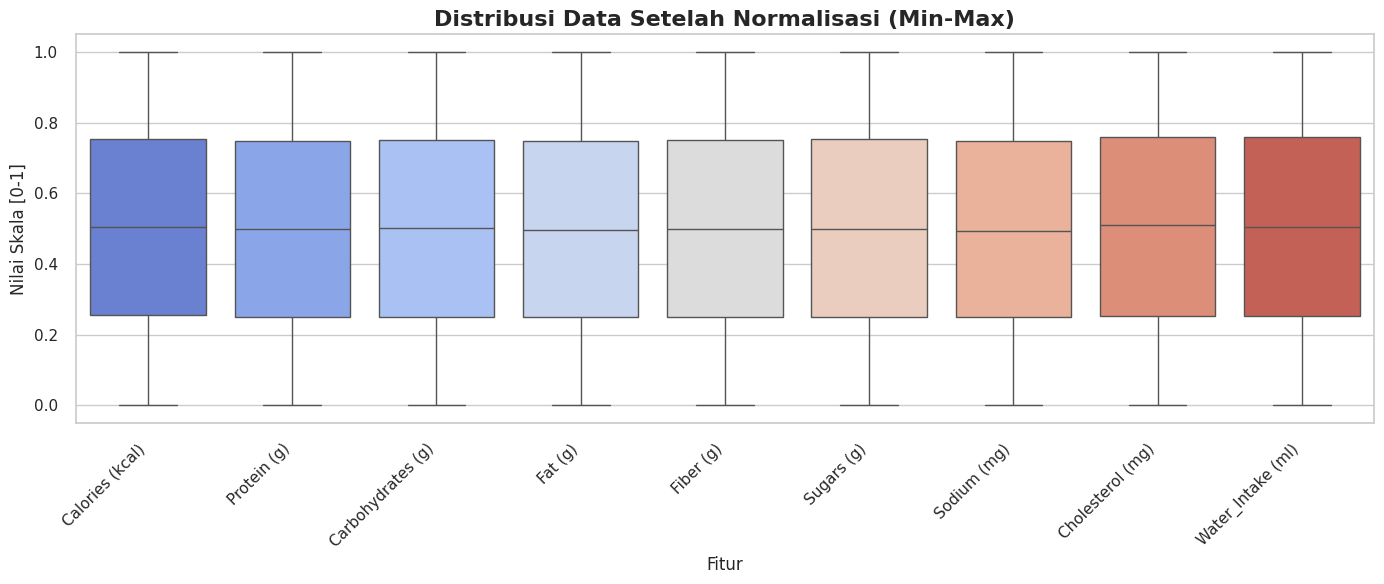

In [ ]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical] = scaler.fit_transform(df_scaled[numerical])

# Ubah format ke long untuk seaborn
df_melted = df_scaled[numerical].melt(var_name='Fitur', value_name='Nilai')

# Plot dengan seaborn
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

sns.boxplot(data=df_melted, x='Fitur', y='Nilai', palette='coolwarm')

plt.title("Distribusi Data Setelah Normalisasi (Min-Max)", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Fitur", fontsize=12)
plt.ylabel("Nilai Skala [0-1]", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Food_Item          10000 non-null  int64  
 1   Category           10000 non-null  int64  
 2   Calories (kcal)    10000 non-null  int64  
 3   Protein (g)        10000 non-null  float64
 4   Carbohydrates (g)  10000 non-null  float64
 5   Fat (g)            10000 non-null  float64
 6   Fiber (g)          10000 non-null  float64
 7   Sugars (g)         10000 non-null  float64
 8   Sodium (mg)        10000 non-null  int64  
 9   Cholesterol (mg)   10000 non-null  int64  
 10  Meal_Type          10000 non-null  int64  
 11  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 937.6 KB


## Insight Data Preprocessing

1. Penghapusan Kolom

- Kolom Date dan User_ID dihapus karena tidak relevan.

2. Transformasi Kategorikal

- Menggunakan Label Encoding untuk mengonversi kolom kategorikal menjadi numerik.

3. Normalisasi Data

- Data numerik dinormalisasi dengan Min-Max Scaling agar skala fitur konsisten [0, 1].

4. Skewness

- Distribusi data menunjukkan skewness normal, sehingga tidak diperlukan transformasi lebih lanjut.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [ ]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

## **b. Evaluasi Model Clustering**

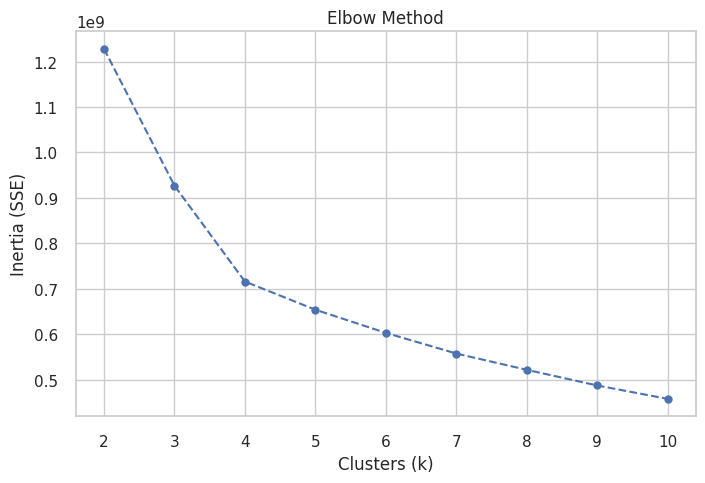

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel("Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.show()

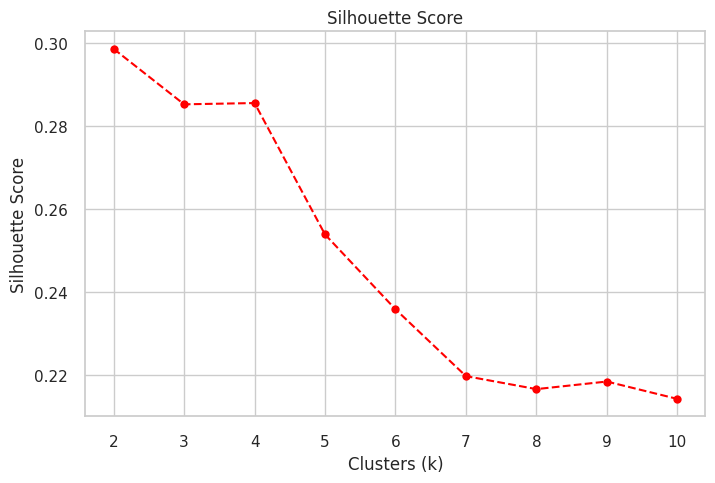

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

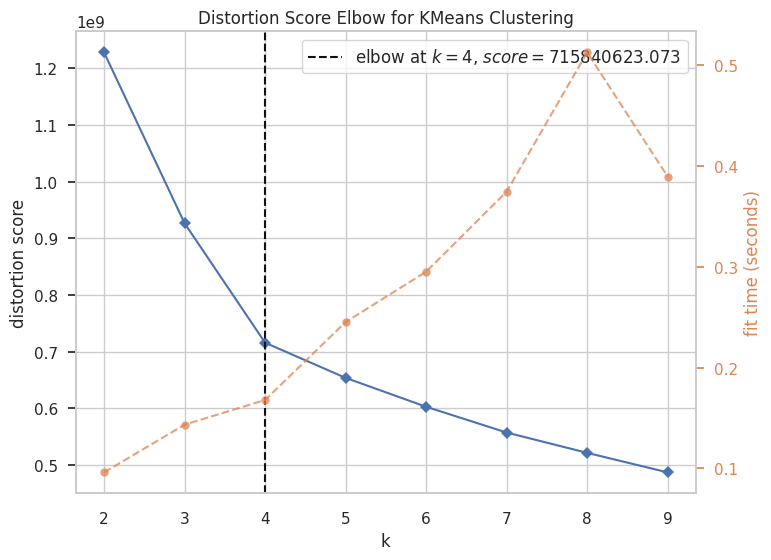

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
kmeans_visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42, n_init=10), k=(2, 10), ax=ax)
kmeans_visualizer.fit(df)
kmeans_visualizer.show()

## Insight
1. Metode Elbow

- Titik siku (Elbow) terjadi pada k = 4, menunjukkan bahwa jumlah klaster optimal berada pada titik ini. Pada titik ini, penurunan inertia (SSE) mulai melambat, menandakan jumlah klaster yang tepat.

2. Silhouette Score

Skor Silhouette tertinggi tercatat pada k = 3 dan k = 4, yang mengindikasikan bahwa klasterisasi dengan k = 3 atau k = 4 memberikan pemisahan yang baik antar klaster. Kedua nilai ini menunjukkan klasterisasi yang stabil dan terpisah dengan jelas.

3. K-ElbowVisualizer

- Visualisasi dari K-ElbowVisualizer juga mengonfirmasi titik siku pada k = 4, mendukung temuan dari metode Elbow bahwa jumlah klaster optimal adalah 4.

## **c. Clustering Full Dataset**

In [ ]:
k_4 = 4
kmeans = KMeans(n_clusters=k_4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df)

In [ ]:
score = silhouette_score(df, df["Cluster"])
print(f"Silhouette Score untuk Model K-Means All Dataset (k4): {score:.4f}")

Silhouette Score untuk Model K-Means All Dataset (k4): 0.2856


## **d. Visualisasi Hasil Clustering**

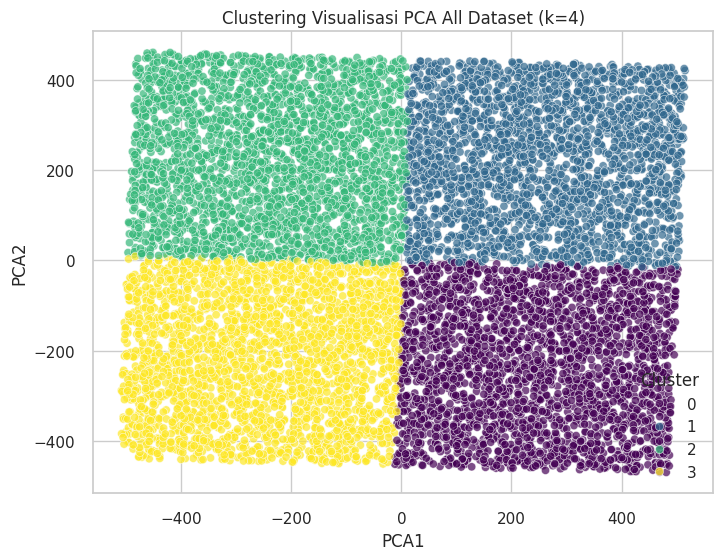

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("Clustering Visualisasi PCA All Dataset (k=4)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

## Insight Clustering Sebelum Feature Selection
1. Akurasi Model

- Model menggunakan algoritma KMeans dengan 4 klaster menghasilkan akurasi 0.4666, yang masih tergolong rendah. Hal ini menunjukkan bahwa meskipun model berhasil membentuk klaster, kualitas klasterisasi belum optimal dalam membedakan data dengan baik.

2. Visualisasi Hasil Clustering

- Dari visualisasi PCA 2D, dapat terlihat bahwa 4 klaster terbentuk dengan pemisahan yang cukup jelas, mengindikasikan adanya perbedaan signifikan dalam karakteristik data antar klaster. Meskipun akurasi rendah, klaster yang terbentuk cukup baik dalam hal pemisahan visual antar kelompok.

##  **Feature Selection Mutual Info dan Reduksi PCA**

In [ ]:
X = df.drop(columns=['Cluster']).copy()
mutual_info = mutual_info_classif(X, np.zeros(X.shape[0]), random_state=42)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mutual_info})
feature_importance = feature_importance.sort_values(by='Mutual_Info', ascending=False)

selected_features = feature_importance['Feature'][:5].tolist()
X_selected = X[selected_features]

In [ ]:
pca = PCA()
pca.fit(X_selected)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.60) + 1

pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_selected)

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_pca)
labels = kmeans.labels_

In [ ]:
print(f"Silhouette Score untuk KMeans Mutual Info (k=6): {score:.4f}")

Silhouette Score untuk KMeans Mutual Info (k=6): 0.2856


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
df_hasil = df.copy()
df_hasil["Cluster_MI_PCA"] = labels
df_hasil = df_hasil.drop(columns=["Cluster", "Cluster2", "PCA1", "PCA2"], errors='ignore')

In [ ]:
df_hasil.head()

,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml),Cluster_MI_PCA
0,13,4,173,42.4,83.7,1.5,1.5,12.7,752,125,2,478,5
1,0,2,66,39.2,13.8,3.2,2.6,12.2,680,97,2,466,2
2,8,4,226,27.1,79.1,25.8,3.2,44.7,295,157,0,635,5
3,1,2,116,43.4,47.1,16.1,6.5,44.1,307,13,3,379,2
4,1,2,500,33.9,75.8,47.0,7.8,19.4,358,148,2,471,1


In [ ]:
df_hasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Food_Item          10000 non-null  int64  
 1   Category           10000 non-null  int64  
 2   Calories (kcal)    10000 non-null  int64  
 3   Protein (g)        10000 non-null  float64
 4   Carbohydrates (g)  10000 non-null  float64
 5   Fat (g)            10000 non-null  float64
 6   Fiber (g)          10000 non-null  float64
 7   Sugars (g)         10000 non-null  float64
 8   Sodium (mg)        10000 non-null  int64  
 9   Cholesterol (mg)   10000 non-null  int64  
 10  Meal_Type          10000 non-null  int64  
 11  Water_Intake (ml)  10000 non-null  int64  
 12  Cluster_MI_PCA     10000 non-null  int32  
dtypes: float64(5), int32(1), int64(7)
memory usage: 976.7 KB


In [ ]:
df_hasil[numerical] = scaler.inverse_transform(df_hasil[numerical])

In [ ]:
for col, encoder in label_encoders.items():
    df_hasil[col] = encoder.inverse_transform(df_hasil[col].astype(int))

In [ ]:
print(df_hasil.head())

        Food_Item Category  Calories (kcal)  Protein (g)  Carbohydrates (g)  \
0            Eggs     Meat          95200.0       2078.6             7956.5   
1           Apple   Fruits          36350.0       1921.8             1316.0   
2  Chicken Breast     Meat         124350.0       1328.9             7519.5   
3          Banana   Fruits          63850.0       2127.6             4479.5   
4          Banana   Fruits         275050.0       1662.1             7206.0   

   Fat (g)  Fiber (g)  Sugars (g)  Sodium (mg)  Cholesterol (mg)  Meal_Type  \
0     74.5       15.0       635.0     752000.0           37500.0      Lunch   
1    157.8       26.0       610.0     680000.0           29100.0      Lunch   
2   1265.2       32.0      2235.0     295000.0           47100.0  Breakfast   
3    789.9       65.0      2205.0     307000.0            3900.0      Snack   
4   2304.0       78.0       970.0     358000.0           44400.0      Lunch   

   Water_Intake (ml)  Cluster_MI_PCA  
0          

## **Hasil Clustering**

In [ ]:
agg_funcs = {}

for col in numerical:
    agg_funcs[col] = ['min', 'max', 'mean']

for col in categorical_cols:
    agg_funcs[col] = lambda x: x.mode().iloc[0]

cluster_summary = df_hasil.groupby('Cluster_MI_PCA').agg(agg_funcs)
cluster_summary.columns = ['_'.join([col[0], col[1]]) if isinstance(col, tuple) else col for col in cluster_summary.columns]
display(cluster_summary)

,Calories (kcal)_min,Calories (kcal)_max,Calories (kcal)_mean,Protein (g)_min,Protein (g)_max,Protein (g)_mean,Carbohydrates (g)_min,Carbohydrates (g)_max,Carbohydrates (g)_mean,Fat (g)_min,...,Sodium (mg)_mean,Cholesterol (mg)_min,Cholesterol (mg)_max,Cholesterol (mg)_mean,Water_Intake (ml)_min,Water_Intake (ml)_max,Water_Intake (ml)_mean,Food_Item_<lambda>,Category_<lambda>,Meal_Type_<lambda>
Cluster_MI_PCA,,,,,,,,,,,,,,,,,,,,,
0,124900.0,176050.0,150829.164248,50.0,2451.0,1206.698607,480.0,9505.0,4922.394080,50.0,...,499497.388276,0.0,90000.0,47075.449797,90100.0,899200.0,490605.745792,Chicken Breast,Meat,Lunch
1,227200.0,277800.0,252343.173963,50.0,2451.0,1265.180242,489.5,9495.5,4929.212270,50.0,...,496891.129032,0.0,90000.0,45107.834101,91000.0,900100.0,496078.283410,Milk,Grains,Dinner
2,27550.0,74300.0,50397.000000,59.8,2446.1,1268.768552,489.5,9495.5,5033.356552,50.0,...,498109.655172,0.0,90000.0,45074.068966,91000.0,899200.0,505597.103448,Orange,Dairy,Snack
3,278350.0,330050.0,303505.296128,50.0,2451.0,1275.890148,480.0,9495.5,5024.132403,50.0,...,501640.091116,0.0,90000.0,44953.530752,90100.0,900100.0,497246.469248,Apple,Fruits,Breakfast
4,176600.0,227200.0,201974.342508,50.0,2451.0,1245.066544,480.0,9495.5,5073.467890,50.0,...,496770.030581,0.0,90000.0,45143.302752,90100.0,900100.0,502198.165138,Carrot,Snacks,Breakfast
5,74850.0,124900.0,99182.970588,50.0,2451.0,1249.963882,480.0,9505.0,5021.095000,50.0,...,494761.764706,0.0,90000.0,45962.647059,90100.0,900100.0,503707.176471,Quinoa,Dairy,Dinner


Hasil Interpretasi:

Cluster 0: Dairy & Sarapan Sehat

Cluster 1: Protein Tinggi & Snack Berat

Cluster 2: Konsumen Grains untuk Sarapan

Cluster 3: Vegetables & Lunch Ringan

Cluster 4: Minuman Manis & Dinner

Cluster 5: Buah & Dinner Sehat

# Analisis Karakteristik Cluster dari Model

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model :

## Cluster 0: Dairy & Sarapan Seimbang
Deskripsi:
Cluster ini terdiri dari makanan berbasis Dairy, terutama Milk, yang dikonsumsi saat sarapan. Makanan ini memiliki profil nutrisi seimbang dan cocok untuk gaya hidup moderat.

Statistik Rata-Rata:
Calories (kcal): 320.67 kcal (Rentang: 50.0 - 600.0 kcal)

Protein (g): 25.14 g (Rentang: 1.0 - 50.0 g)

Carbohydrates (g): 51.50 g (Rentang: 5.0 - 99.9 g)

Sodium (mg): 505.43 mg

Cholesterol (mg): 151.41 mg (Rentang: 0.0 - 300.0 mg)

Water Intake (ml): 558.65 ml (Rentang: 100.0 - 1000.0 ml)

Analisis:
Cluster ini menunjukkan sarapan bergizi berbasis susu, dengan kandungan energi dan protein yang cukup tinggi, serta hidrasi yang baik. Meskipun memiliki kandungan kolesterol dan sodium yang lebih tinggi, makanan ini cocok untuk mereka yang mencari sarapan bergizi dan padat kalori.

## Cluster 1: Protein Tinggi & Snack Pagi
Deskripsi:
Cluster ini terdiri dari makanan snack berbasis Pork Chop yang sering dikonsumsi saat sarapan. Makanan ini kaya akan protein tinggi dan energi untuk memulai hari.

Statistik Rata-Rata:

Calories (kcal): 330.07 kcal (Rentang: 50.0 - 600.0 kcal)

Protein (g): 25.86 g (Rentang: 1.0 - 50.0 g)

Carbohydrates (g): 52.93 g (Rentang: 5.0 - 100.0 g)

Sodium (mg): 497.89 mg

Cholesterol (mg): 152.48 mg (Rentang: 0.0 - 300.0 mg)

Water Intake (ml): 555.81 ml (Rentang: 100.0 - 1000.0 ml)

Analisis :
Cluster ini mencerminkan konsumsi snack berat dengan protein tinggi seperti Pork Chop, cocok untuk sarapan yang memberikan energi dan rasa kenyang lebih lama. Meskipun tinggi kolesterol dan sodium, makanan ini padat kalori dan mendukung pola makan yang aktif di pagi hari.

## Cluster 2: Grains & Sarapan Sehat
Deskripsi:
Cluster ini berfokus pada makanan berbasis grains seperti Quinoa, yang sering dikonsumsi saat sarapan. Cocok untuk pola makan sehat dan seimbang.

Statistik Rata-Rata:

Calories: 330.18 kcal (50.0 – 600.0 kcal)

Protein: 25.31 g (1.0 – 49.9 g)

Carbohydrates: 52.02 g (5.1 – 99.9 g)

Sodium: 494.38 mg

Cholesterol: 153.52 mg (0.0 – 300.0 mg)

Water Intake: 558.10 ml (100.0 – 999.0 ml)

Analisis:
Cluster ini mencerminkan gaya hidup sehat dengan konsumsi biji-bijian seperti quinoa. Cocok untuk individu yang mengutamakan nutrisi seimbang di pagi hari.

## Cluster 3: Sayuran & Lunch Ringan
Deskripsi:
Didominasi makanan berbasis sayuran seperti carrot, umumnya dikonsumsi saat makan siang.

Statistik Rata-Rata:

Kalori: 321.51 kcal

Protein: 25.63 g

Karbohidrat: 52.75 g

Sodium: 499.95 mg

Kolesterol: 150.05 mg

Asupan Air: 547.23 ml

Analisis:
Cluster ini mencerminkan pilihan makan siang ringan dan bergizi, ideal untuk mereka yang menjaga pola makan seimbang dan rendah lemak.

## Cluster 4: Minuman & Dinner
Deskripsi:
Fokus pada konsumsi minuman seperti orange juice saat makan malam.

Statistik Rata-Rata:

Kalori: 332.23 kcal

Protein: 25.57 g

Karbohidrat: 53.68 g

Sodium: 493.15 mg

Kolesterol: 149.92 mg

Air: 549.69 ml

Analisis:
Menunjukkan pola makan malam yang didominasi minuman manis alami, memberi asupan energi ringan namun tetap tinggi karbohidrat dari gula buah.

## Cluster 5: Buah & Dinner Sehat
Deskripsi:
Fokus konsumsi buah seperti jeruk saat makan malam.

Statistik Rata-Rata:
Kalori: 329.16 kcal

Protein: 25.37 g

Karbohidrat: 52.31 g

Sodium: 497.54 mg

Kolesterol: 153.17 mg

Air: 554.69 ml

Analisis:
Menunjukkan pola makan malam sehat dan ringan dengan asupan buah, cocok untuk gaya hidup seimbang.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df['label_hasil'] = labels

In [ ]:
top_5_features = ['Meal_Type', 'Category', 'Food_Item', 'Calories (kcal)', 'Protein (g)']
final = df[top_5_features + ['label_hasil']]

In [ ]:
final.head()

,Meal_Type,Category,Food_Item,Calories (kcal),Protein (g),label_hasil
0,2,4,13,173,42.4,5
1,2,2,0,66,39.2,2
2,0,4,8,226,27.1,5
3,3,2,1,116,43.4,2
4,2,2,1,500,33.9,1


In [ ]:
final.to_csv('final_hasil.csv', index=False)